### Customer Database
- attr: username, password, qr_images, loyaltyPoint

### Vendor Database
- attr: username, password

In [23]:
# takes the Customer instance and updates customer database
def updateDatabase(Customer):        
    return

### UserRetriever
- search user or vendor database and returns the user or vendor class

In [154]:
class UserRetriever():
    def retrieveCustomer(username, password):
        # Search customer database and return customer class
        return Customer()
        
    
    def retrieveVendor(username, password):
        # Search vendor database and return vendor class
        return Vendor()
        

### QRGenerator

In [47]:
import qrcode
class QRGenerator():
    def __init__(self): 
        self.qr_generator = qrcode.QRCode(version=1,
                                          box_size=10,
                                          border=5)
        
    def generate_qr(self,username, voucherID):
                    input_data = f"{username},{voucherID}"
                    self.qr_generator.clear()
                    self.qr_generator.add_data(input_data)
                    return self.qr_generator.make_image() 

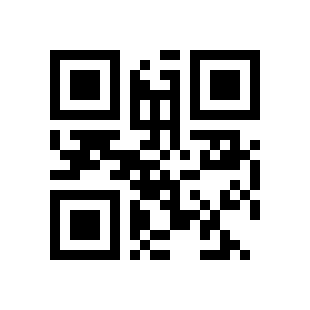

In [48]:
Gen  = QRGenerator()
Gen.generate_qr("jacky","V124")    # scanning this gives "jacky,V124"

### Customer

In [43]:
class Customer():
    def __init__(self, username:str, password:str,qr_images:list , loyaltyPoints: int): 
        self.username = username
        self.password = password
        self.qr_images = qr_images
        self.loyaltyPoints = loyaltyPoints
        self.cart = {"10 Dollar Voucher": 0,
                     "20 Dollar Voucher": 0,
                     "50 Dollar Voucher": 0,
                     "100 Dollar Voucher": 0} 
        
    def add_voucher(self, voucherAmount):
        self.cart[voucherAmount]+=1
    def drop_voucher(self, voucherAmount):
        if self.cart[voucherAmount]>0:
            self.cart[voucherAmount]-=1
                
    def purchase(self):
        return
        # assume payment made successfully
        # generate QR for every voucher in cart
        # update database  

In [44]:
C = Customer("Jack","eedo1dw029",[],100)

In [45]:
C.add_voucher("100 Dollar Voucher")
C.add_voucher("50 Dollar Voucher")
C.drop_voucher("50 Dollar Voucher")

### Vendor

In [ ]:
class Vendor():
    def __init__(self,username,password):
        self.username = username
        self.password = password
    def scanQR()
        # should update customer database/ remove the voucher